In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
import pandas as pd
from sklearn import svm

In [2]:
data = np.genfromtxt('ex6data1.txt')
X = data[:, :2]
y = data[:, 2]

In [3]:
def plotData(X, y, title = None, width = None, height = None):
    if width == None and height == None:
        fig, ax = plt.subplots(figsize = (8,6))
    else:
        fig, ax = plt.subplots(figsize = (width, height))
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    ax.scatter(X[pos, 0], X[pos, 1], marker = '+', s = 60)
    ax.scatter(X[neg, 0], X[neg, 1], s = 55)
    ax.set_title(title)
    return fig, ax

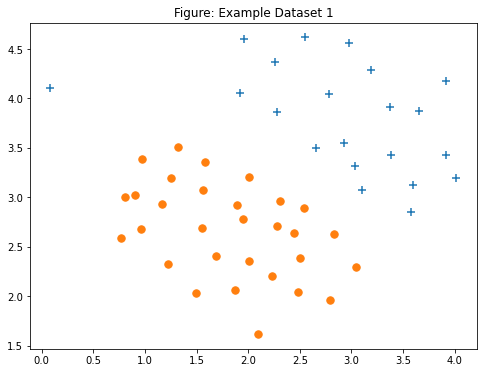

In [4]:
fig, ax = plotData(X, y, 'Figure: Example Dataset 1')

In [5]:
def visualizeBoundaryLinear(X, model, fig, ax):
    
    theta = model.coef_[0]
    b     = model.intercept_[0]
    xp    = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    yp    = (- b - theta[0] * xp) / theta[1]
    ax.plot(xp, yp, color = 'purple')
    
    return fig, ax

Training accuracy: 98.0392156862745 %
--------------------------------------


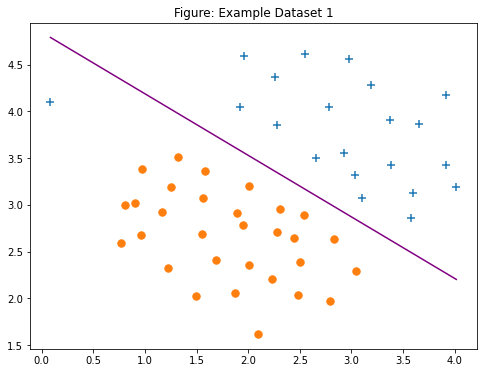

In [6]:
model = svm.SVC(kernel = 'linear', C = 1)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = visualizeBoundaryLinear(X, model, fig, ax)
fig

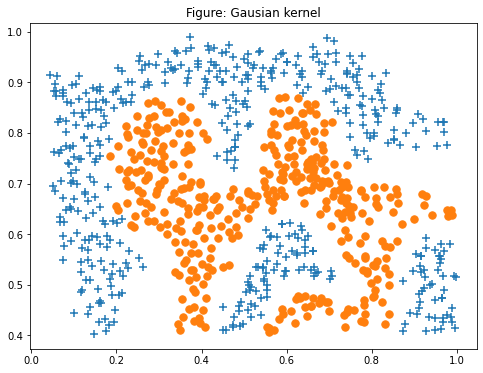

In [7]:
del fig, ax
data = np.genfromtxt('ex6data2.txt')
X = data[:, :2]
y = data[:, 2]
fig, ax = plotData(X, y, 'Figure: Gausian kernel')

In [8]:
def GaussianSvmBoundary(X, y, model, width = None, height = None):
    fig, ax = plotData(X, y, width = width, height = height)
    x1plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).T
    x2plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.concatenate((X1[:, i].reshape((-1, 1)), X2[:, i].reshape((-1, 1))), axis = 1)
        vals[:, i] = model.predict(this_X)
    ax.contour(X1, X2, vals)
    return fig, ax

Training accuracy: 98.72537659327925 %
--------------------------------------


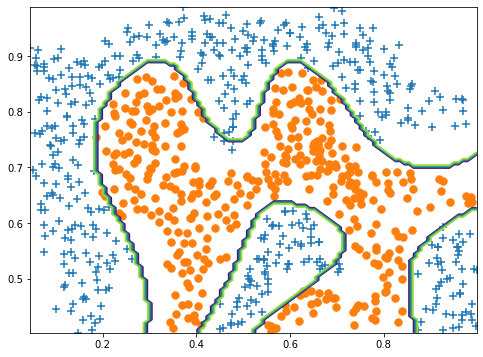

In [9]:
del fig, ax
model = svm.SVC(kernel = 'rbf', C = 1000)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = GaussianSvmBoundary(X, y, model)
plt.show()

In [10]:
data = np.genfromtxt('ex6data3_train.txt')
X = data[:, :2]
y = data[:, 2]

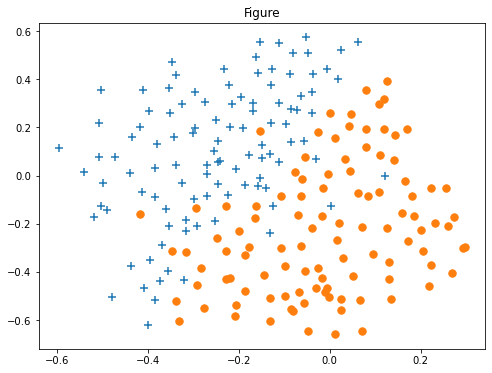

In [11]:
fig, ax = plotData(X, y, 'Figure')

Training accuracy: 93.8388625592417 %
--------------------------------------


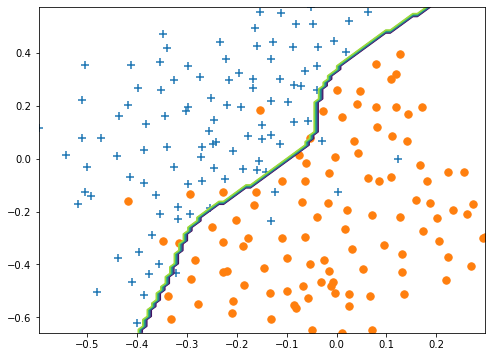

In [12]:
del fig, ax
model = svm.SVC(kernel = 'rbf', C = 1000)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = GaussianSvmBoundary(X, y, model)
plt.show()

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  Y


In [8]:
import numpy as np                                                    # use for numeric calculation
import matplotlib.pyplot as plt                                       # use to plot data
import scipy.optimize as op                                           # use for ... nothing
import pandas as pd                                                   # use to save string vocab
import re                                                             # regex, use to clean some html tag, url,... 
from sklearn import svm                                               # use to train model

In [12]:
vocabList = pd.read_csv('vocab.txt', delimiter = '\t', header = None)
with open('emailSample1.txt') as f:
    email_content = f.read()
f.close()
vocabList

,0,1
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
...,...,...
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero


In [13]:
vocabList.iloc[:, 0] = vocabList.iloc[:, 0] - 1
print(vocabList)
print('--------------------------------------------------------------------------')
print(email_content)

         0         1
0        0        aa
1        1        ab
2        2      abil
3        3       abl
4        4     about
...    ...       ...
1894  1894      your
1895  1895  yourself
1896  1896     zdnet
1897  1897      zero
1898  1898       zip

[1899 rows x 2 columns]
--------------------------------------------------------------------------
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [ ]:
def proccessEmail(email_content, vocabList):
    email_content = email_content.lower()                                           # lower case
    email_content = re.sub('<.*?>', '', email_content)                              # strip all HTML tag
    email_content = re.sub('http://.*?/', 'httpaddr', email_content)                # handle URLS
    email_content = re.sub('[\w\.-]+@[\w\.-]+', 'emailaddr', email_content)         # handle email address
    email_content = re.sub('\d+', 'number', email_content)                            # handle number
    email_content = re.sub('\$', 'dollar', email_content)                           # handle dollar sign    
    email_content = re.sub('\n', ' ', email_content)                                # handle with endline
    email_content = re.sub('[^a-z\s]','', email_content)                            # strip all none alphabet
    
    email_content = email_content.split()
    word_indices = np.zeros(len(vocabList))
    
    for i in range(len(email_content)):
        if (email_content[i][-1] == 's' and email_content[i][-2] != 's') or (email_content[i][-1] == 'e' and email_content[i] != 'be'):
            email_content[i] = email_content[i][: -1]
        elif email_content[i][-1] == 'y':
            email_content[i] = email_content[i][:-1] + 'i'
        elif (email_content[i][-3:] == 'ing' and email_content[i][-4] == email_content[i][-5]):
            email_content[i] = email_content[i][:-4]
        elif email_content[i][-3:] == 'ing':
            email_content[i] = email_content[i][:-3]
        
        if(len(email_content[i]) <= 1):
            continue
        else:
            for j in range(len(vocabList)):
                if(vocabList.iloc[j, 1] == email_content[i]):
                    word_indices[j] = 1
                    break
    
    return word_indices

In [ ]:
# this code just show you how to process email, it'll run very slow, if you want to build a model run more quickly
# , maybe you need to know suffix tree
word_indices = proccessEmail(email_content, vocabList)
np.where(word_indices == 1)

In [ ]:
# now load data processed to train model
data = np.genfromtxt('spamTrain.txt')
X = data[:, 1:]
y = data[:, 0]

In [ ]:
# train model
model = svm.SVC(kernel = 'rbf', C = 1000)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')

In [ ]:
# predict model
data = np.genfromtxt('spamTest.txt')
X = data[:, 1:]
y = data[:, 0]
pred = model.predict(X)
print('Predict accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')

In [7]:
type(float(number))

float